In [1]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
try:
    news = pd.read_csv('abcnews-date-text.csv')
except FileNotFoundError:
    print("Dataset not found. Please check the file path.")

In [3]:
# Display basic information about the dataset
print("Dataset Info:")
news.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244184 entries, 0 to 1244183
Data columns (total 2 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   publish_date   1244184 non-null  int64 
 1   headline_text  1244184 non-null  object
dtypes: int64(1), object(1)
memory usage: 19.0+ MB


In [5]:
# Quick look at the first few rows
print("\nFirst few rows of the dataset:")
news.head()


First few rows of the dataset:


,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


In [6]:
# Check for missing values
print("\nMissing values in each column:")
news.isnull().sum()


Missing values in each column:


publish_date     0
headline_text    0
dtype: int64

In [7]:
# Check for duplicates
print("\nTotal number of duplicate rows:")
news.duplicated().sum()


Total number of duplicate rows:


np.int64(2)

In [8]:
# Drop duplicates if any
news.drop_duplicates(inplace=True, ignore_index=True)
print("\nData after dropping duplicates:")
news.info()


Data after dropping duplicates:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244182 entries, 0 to 1244181
Data columns (total 2 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   publish_date   1244182 non-null  int64 
 1   headline_text  1244182 non-null  object
dtypes: int64(1), object(1)
memory usage: 19.0+ MB


In [9]:
# Check the unique values in 'headline_text'
print("\nUnique headlines count:")
news['headline_text'].nunique()


Unique headlines count:


1213004

In [10]:
# Handle missing values in 'headline_text' by dropping rows where 'headline_text' is NaN
news.dropna(subset=['headline_text'], inplace=True)
print("\nData after handling missing 'headline_text' values:")
news.info()


Data after handling missing 'headline_text' values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244182 entries, 0 to 1244181
Data columns (total 2 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   publish_date   1244182 non-null  int64 
 1   headline_text  1244182 non-null  object
dtypes: int64(1), object(1)
memory usage: 19.0+ MB


In [11]:
# Convert 'publish_date' to datetime
news['publish_date'] = pd.to_datetime(news['publish_date'], format='%Y%m%d')
print("\nData after converting 'publish_date' to datetime:")
news.info()


Data after converting 'publish_date' to datetime:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244182 entries, 0 to 1244181
Data columns (total 2 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   publish_date   1244182 non-null  datetime64[ns]
 1   headline_text  1244182 non-null  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 19.0+ MB


In [12]:
# Exploratory Data Analysis: Top 5 headlines by frequency
print("\nTop 5 most frequent headlines:")
news['headline_text'].value_counts().head()


Top 5 most frequent headlines:


headline_text
national rural news                      983
abc sport                                718
abc weather                              714
abc business news and market analysis    585
abc entertainment                        551
Name: count, dtype: int64

In [22]:
business_news = news[news['headline_text'].str.contains('business|market|finance|stocks|economy|investment|trading', case=False)].copy()
print("\nBusiness News Headlines:")
business_news['headline_text'].head()


Business News Headlines:


20     businesses should prepare for terrorist attacks
151                     resource stocks boost all ords
163              shire offers assurances over finances
165           slow recovery predicted for aust economy
341                      mud crab business on the move
Name: headline_text, dtype: object

In [23]:
business_news.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26866 entries, 20 to 1244147
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   publish_date   26866 non-null  datetime64[ns]
 1   headline_text  26866 non-null  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 629.7+ KB


In [24]:
# Perform sentiment analysis on the copied DataFrame
business_news['polarity'] = business_news['headline_text'].apply(lambda x: TextBlob(x).sentiment.polarity)
business_news['subjectivity'] = business_news['headline_text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

In [25]:
# Display the first few rows after sentiment analysis
print("\nBusiness news data with polarity and subjectivity scores:")
business_news[['headline_text', 'polarity', 'subjectivity']].head()


Business news data with polarity and subjectivity scores:


,headline_text,polarity,subjectivity
20,businesses should prepare for terrorist attacks,0.0,0.0
151,resource stocks boost all ords,0.0,0.0
163,shire offers assurances over finances,0.1,0.0
165,slow recovery predicted for aust economy,-0.3,0.4
341,mud crab business on the move,0.0,0.0


Text(0, 0.5, 'Frequency')

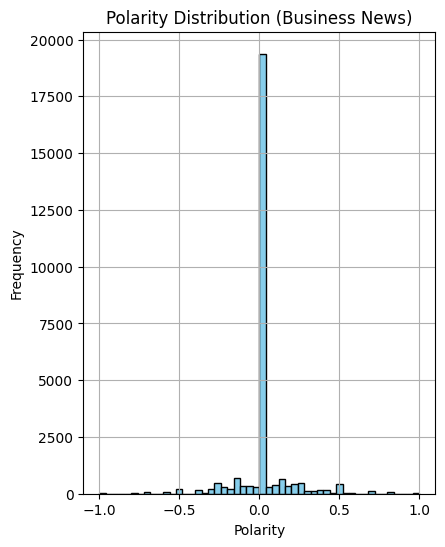

In [26]:
# Visualize sentiment distribution for business news
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
business_news['polarity'].hist(bins=50, color='skyblue', edgecolor='black')
plt.title('Polarity Distribution (Business News)')
plt.xlabel('Polarity')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

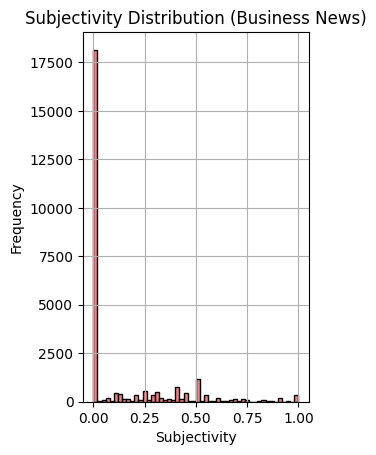

In [27]:
plt.subplot(1, 2, 2)
business_news['subjectivity'].hist(bins=50, color='lightcoral', edgecolor='black')
plt.title('Subjectivity Distribution (Business News)')
plt.xlabel('Subjectivity')
plt.ylabel('Frequency')

In [28]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [29]:
# Filter data to focus on important columns for business news
business_news_df = business_news[['publish_date', 'headline_text', 'polarity', 'subjectivity']]

In [30]:
# Reset index for the final business news dataframe
business_news_df.reset_index(drop=True, inplace=True)

In [31]:
# Display the final cleaned dataframe for business news
print("\nFinal cleaned business news dataframe:")
business_news_df.head()


Final cleaned business news dataframe:


,publish_date,headline_text,polarity,subjectivity
0,2003-02-19,businesses should prepare for terrorist attacks,0.0,0.0
1,2003-02-19,resource stocks boost all ords,0.0,0.0
2,2003-02-19,shire offers assurances over finances,0.1,0.0
3,2003-02-19,slow recovery predicted for aust economy,-0.3,0.4
4,2003-02-20,mud crab business on the move,0.0,0.0


In [32]:
# Save the cleaned business news data to a CSV file
business_news_df.to_csv('cleaned_business_news.csv', index=False)
print("Cleaned business news data has been saved to 'cleaned_business_news.csv'")

Cleaned business news data has been saved to 'cleaned_business_news.csv'
